# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [2]:
# importar librerías
import pandas as pd #trabajar con tablas de datos
import numpy as np #operaciones matematicas y numericas
from matplotlib import pyplot as plt #generar visualizaciones (graficos)

In [3]:
# leer conjuntos de datos en los DataFrames
df_instacart_orders=pd.read_csv('/datasets/instacart_orders.csv', sep=";")
df_products=pd.read_csv('/datasets/products.csv',  sep=";")
df_aisles=pd.read_csv('/datasets/aisles.csv',  sep=";")
df_departments=pd.read_csv('/datasets/departments.csv',  sep=";")
df_order_products=pd.read_csv('/datasets/order_products.csv',  sep=";")

In [4]:
# mostrar información del DataFrame
df_instacart_orders.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [5]:
# mostrar información del DataFrame
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
# mostrar información del DataFrame
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
# mostrar información del DataFrame
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [8]:
# mostrar información del DataFrame
df_order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.
Se observa que todas los DataFrames tienen informacion object, los DataFrames contiene datos ausentes excepto df_order_products. Los DataFrames se relacionan de la siguiente manera: order_products contiene las columnas product_id que se relaciona con el DataFrame products, asi mismo contiene la columna order_id que tiene relacion con el DataFrame instacart_orders y lo mismo con la columna department_id que esta dentro del DataFrame departments, para el caso del DataFrame products contiene la columna aisles_id que esta dentro del DataFrame aisles.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

Para verificar y corregir los tipos de datos ID para que sean numeros enteros se debe seleccionar cada columna de ID e indicar que son int(), para identificar los valores ausentes debo validar en cada DataFrame con el siguiente codigo print(df.isna().sum()) y para identificar los valores duplicados se usa el siguiente codigo print(df.duplicated()), print(df.duplicated().sum())

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [9]:
# Revisa si hay pedidos duplicados
(df_instacart_orders.duplicated())
(df_instacart_orders.duplicated().sum())
df_instacart_orders[df_instacart_orders.duplicated(keep='first')]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común? 
Si existen 15 lineas duplicadas y tienen en comun que se ejecutaron el dia miercoles (order_dow) a las 2 pm (order_dow	order_hour_of_day)

In [10]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
pedidos_dia=df_instacart_orders.query('order_dow==3 & order_hour_of_day==2')
print(pedidos_dia)


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado? Que durante ese dia y en esa hora hubo 121 ordenes.

In [11]:
# Elimina los pedidos duplicados
df_instacart_orders=df_instacart_orders.drop_duplicates()

In [12]:
# Vuelve a verificar si hay filas duplicadas
(df_instacart_orders.duplicated())
(df_instacart_orders.duplicated().sum())

0

In [13]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
(df_instacart_orders.duplicated('order_id')).sum()


0

Describe brevemente tus hallazgos y lo que hiciste con ellos. En el DataFrame de df_instacart_orders se hallaron 15 valores duplicados, se uso el codigo drop_duplicates() para eliminarlos y se verifico nuevamente y especificamente en la columna 

### `products` data frame

In [14]:
# Verifica si hay filas totalmente duplicadas
(df_products.duplicated())
(df_products.duplicated().sum())


0

In [15]:
# Revisa únicamente si hay ID de productos duplicados
(df_products.duplicated(subset=['product_id'], keep=False)).sum()

0

In [16]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products['product_name'].str.upper().duplicated(keep=False).sum()


1465

In [17]:
df_products[df_products['product_name'].str.upper().duplicated(keep=False)]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
41,42,Biotin 1000 mcg,47,11
71,72,NaN,100,21
109,110,NaN,100,21
185,186,Fresh Scent Dishwasher Detergent with Dawn,74,17
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [18]:
# Revisa si hay nombres duplicados de productos no faltantes
df_products[(df_products['product_name'].str.upper().duplicated(keep=False)) & ((~df_products['product_name'].isna()))]

,product_id,product_name,aisle_id,department_id
41,42,Biotin 1000 mcg,47,11
185,186,Fresh Scent Dishwasher Detergent with Dawn,74,17
515,516,American Cheese Slices,21,16
1538,1539,Cauliflower head,83,4
1783,1784,NUTrition Protein Mix Blueberry Nut,117,19
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Describe brevemente tus hallazgos y lo que hiciste con ellos. En el DataFrame df_products muestra que no hay filas totalmente duplicadas, que en la columna product_id no hay duplicados, sin embargo en la columna product_name si hay 1465 nombres duplicados, primero dentro de la condicion se solicito colocar las filas en mayuscula, seguido validar los duplicados y visualizarlos, y por ultimo usar el metodo isna() para validar los valores ausentes aunque la pregunta era sobre nombres duplicados de producto no faltantes usamos dentro de la condicion el simbolo ~ y de esta manera me muestra los duplicados que son 207 filas.

### `departments` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
(df_departments.duplicated())
(df_departments.duplicated().sum())

0

In [20]:
# Revisa únicamente si hay IDs duplicadas de departamentos
(df_departments.duplicated(subset=['department_id'], keep=False)).sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos. Se valido en el DataFrame df_departments y no se evidencio que hayan filas duplicadas, y se valido en la columna department_id y tambpoco se evidenciaron duplicados.

### `aisles` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
(df_aisles.duplicated())
(df_aisles.duplicated().sum())

0

In [22]:
# Revisa únicamente si hay IDs duplicadas de pasillos
(df_aisles.duplicated(subset=['aisle_id'], keep=False)).sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos. Se valido en el DataFrame df_aisles y no se evidencio que hayan filas duplicadas, y se valido en la columna aisle_id y tambpoco se evidenciaron duplicados.

### `order_products` data frame

In [23]:
# Revisa si hay filas totalmente duplicadas
(df_order_products.duplicated())
(df_order_products.duplicated().sum())

0

In [24]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
(df_order_products.duplicated(subset=['order_id'], keep=False)).sum()

4523160

Describe brevemente tus hallazgos y lo que hiciste con ellos. Se evidencia que en la columna order_id si existen duplicados engañosos que se dan por que pueden haber varios productos que corresponde a una misma orden.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [25]:
# Encuentra los valores ausentes en la columna 'product_name'
(df_products['product_name'].isna().sum())

1258

Describe brevemente cuáles son tus hallazgos. Se observa que en la columna product_name del DataFrame products se evidenciaron 1258 valores ausentes.

In [26]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
pasillo=df_products[df_products['product_name'].isna()]
print(pasillo)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos. Si, efectivamente validando la informacion de los valores ausentes de la columna product_name el dato en comun es que estan ubicados en el pasillo 100 y en el department_id 21

In [27]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
departamento=df_products[df_products['product_name'].isna()]
print(departamento)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos. Si, efectivamente validando la informacion de los valores ausentes de la columna product_name el dato en comun es que estan ubicados en el department_id 21 y en el pasillo 100 y

In [28]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
productos_ausentes=df_products.query('aisle_id==100 & department_id==21')
print(productos_ausentes.sample(50))

       product_id product_name  aisle_id  department_id
25657       25658          NaN       100             21
47721       47722          NaN       100             21
10042       10043          NaN       100             21
47407       47408          NaN       100             21
5212         5213          NaN       100             21
38976       38977          NaN       100             21
9250         9251          NaN       100             21
34999       35000          NaN       100             21
17627       17628          NaN       100             21
46565       46566          NaN       100             21
33434       33435          NaN       100             21
49668       49669          NaN       100             21
48582       48583          NaN       100             21
25057       25058          NaN       100             21
29113       29114          NaN       100             21
38645       38646          NaN       100             21
45020       45021          NaN       100        

Describe brevemente cuáles son tus hallazgos. Para obtener la informacion requerida de la columna aisle_id y department_id use la funcion groupby para observar los productos de esas columnas y se evidencia los 1258 valores ausentes de product_id.

In [29]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products["product_name"].fillna("Unknown", inplace=True)
(df_products['product_name'].isna().sum())

0

Describe brevemente tus hallazgos y lo que hiciste con ellos. Se renombro los valores ausentes de la columna product_name con .fillna() y se valido que no hubiera mas valores ausentes.

### `orders` data frame

In [30]:
# Encuentra los valores ausentes
(df_instacart_orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [31]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
primer_pedido=df_instacart_orders.query('order_number>1')
print(primer_pedido.sample(10))
(primer_pedido.isna().sum())

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
300077    526854    29419             2          6                 13   
301635   3358414     8650            30          5                 11   
461288   1455097    29076            50          5                 15   
118318   2304343    97892             5          4                 19   
246670   3295779    56507             6          1                  9   
312355   2202434   132066            21          3                 10   
4888     2722258   198784            14          6                 11   
6614     1902036   152507            22          5                 12   
347221   2227679   116795            11          0                 15   
93824    1396758   170749             2          2                 20   

        days_since_prior_order  
300077                    30.0  
301635                     7.0  
461288                     1.0  
118318                     0.0  
246670                     5.0 

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos. Validando la informacion de los valores ausentes del DataFrame orders se evidencia que en la columna days_since_prior_order hay un total de 28817, sin embargo al validar los pedidos diferentes al numero 1 podemos concluir que los valores ausentes corresponden a los pedidos número 1 que no tienen informacion de dias transcurridos.

### `order_products` data frame

In [32]:
# Encuentra los valores ausentes
(df_order_products.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [33]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(min(df_order_products["add_to_cart_order"]), max(df_order_products["add_to_cart_order"]))

1.0 64.0


Describe brevemente cuáles son tus hallazgos.Se validaron los valores ausentes el DataFrame order_products y se evidencia que en la columna add_to_cart_order hay 836 y como corresponden a el orden secuencial en el que se añadió cada artículo en el carrito el valor minimo es de 1 y el maximo de 64 es decir que se han añadido hasta 64 articulos.

In [34]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
ordenes_ausentes=df_order_products.query('add_to_cart_order.isnull()')
print(ordenes_ausentes["order_id"])

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [35]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
df_order_products.query('add_to_cart_order>64')
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
pedidos_ausentes=df_order_products.query('add_to_cart_order.isnull()')
print(pedidos_ausentes["product_id"])
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
conteo_productos_por_pedido = df_order_products.groupby('order_id')['product_id'].count()
min_productos = conteo_productos_por_pedido.min()
print(f"El número mínimo de productos en un pedido es: {min_productos}")

737         5068
9926       43867
14394      11688
16418       4142
30114      42828
           ...  
4505662     7411
4511400      260
4517562     9517
4534112    17835
4535739    17949
Name: product_id, Length: 836, dtype: int64
El número mínimo de productos en un pedido es: 1


Describe brevemente cuáles son tus hallazgos. De acuerdo con el ejercicio, no todos los valores ausentes tienen mas de 64 productos ya que el maximo es hasta 64 y el valor minimo es 1.

In [36]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order'].fillna("999", inplace=True)
(df_order_products['add_to_cart_order'].isna().sum())
df_order_products['add_to_cart_order'].astype(int)


0          17
1           1
2           1
3          35
4           5
           ..
4545002    12
4545003     9
4545004     4
4545005     8
4545006     9
Name: add_to_cart_order, Length: 4545007, dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos. Se reemplaza todos los valores ausentes con 999 y se hace la conversion de tipo de dato a entero y ya no muestra en esa columna valores ausentes.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos 
Dentro del procesamiento de datos es importante validar la duplicidad de los datos, que sean reales y no engañosos, eliminar dicha informacion para tener valores a la realidad, asi mismo convertir los datos ausentes o eliminarlos sin que esto afecte la informacion de la tabla. Tambien se debe observar las caracteristicas de la informacion para poder agrupar de mejor manera los datos y asi comprender la similitud que pueda presentarse en los datos presentados y la interrelacion de los diferentes DataFrame.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [37]:
print("Valores únicos en 'order_hour_of_day':", df_instacart_orders['order_hour_of_day'].unique())
invalid_hours = df_instacart_orders[(df_instacart_orders['order_hour_of_day'] < 0) | (df_instacart_orders['order_hour_of_day'] > 23)]
print("Pedidos con horas inválidas:", invalid_hours.shape[0])

Valores únicos en 'order_hour_of_day': [13 12 19 20 11  8 18 15 16  9 22 10  0 14 17  1  7  6  2 21  3 23  5  4]
Pedidos con horas inválidas: 0


In [38]:
print("Valores únicos en 'order_dow':", df_instacart_orders['order_dow'].unique())
invalid_dow = df_instacart_orders[(df_instacart_orders['order_dow'] < 0) | (df_instacart_orders['order_dow'] > 6)]
print("Pedidos con días de la semana inválidos:", invalid_dow.shape[0])

Valores únicos en 'order_dow': [6 5 0 4 3 1 2]
Pedidos con días de la semana inválidos: 0


Escribe aquí tus conclusiones: Al verificar los valores en la columna order_hour_of_day se evidencia que oscilan entre 0 y 23 y el caso de la columna order_dow oscila entre 0 y 6.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

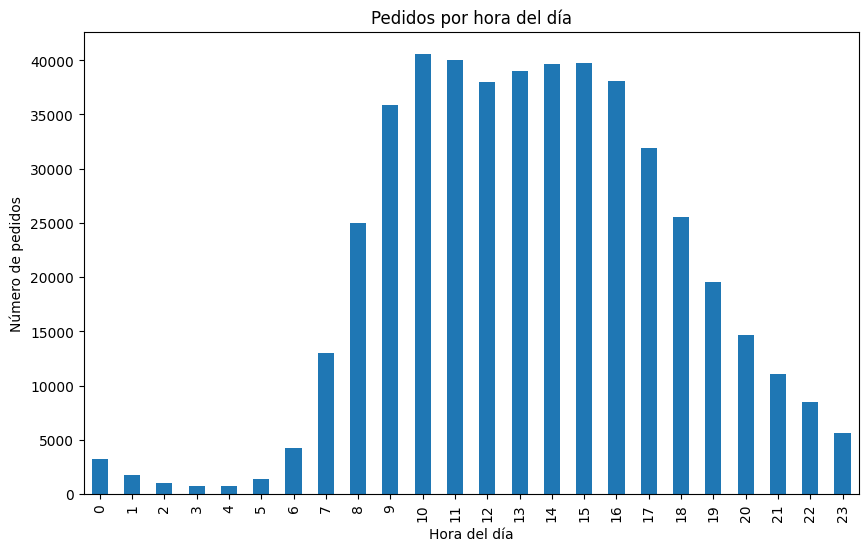

In [39]:
ordenes_hora = df_instacart_orders['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(10,6))
ordenes_hora.plot(kind='bar')
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.title('Pedidos por hora del día')
plt.show()


Escribe aquí tus conclusiones. Se puede evidenciar que la hora en que mas hay pedidos es a las 10 am que llegan a un poco mas de 40.000 pedidos, adicionalmente se observa que hay un rango de horas entre las 10 y las 16 se mantiene un rango de los pedidos entre 35.000 y 40.000 el numero de pedidos. Las primeras horas del dia hasta antes las 6 am los pedidos son minimos considero que es por que a esas horas las personas estan durmiendo, y los que hacen esos pedidos es posiblemente por que trabajan en esa jornada y tiene la disponibilidad de hacerlo en ese momento. A partir de las 17 comienzan a disminuir los pedidos considero es por que las personas ya salen de jornada o de su actividad del dia y los que hacen esos pedidos es por que pueden estar en sus casas validando actividades personales y aprovechan para hacer los pedidos.

### [A3] ¿Qué día de la semana compran víveres las personas?

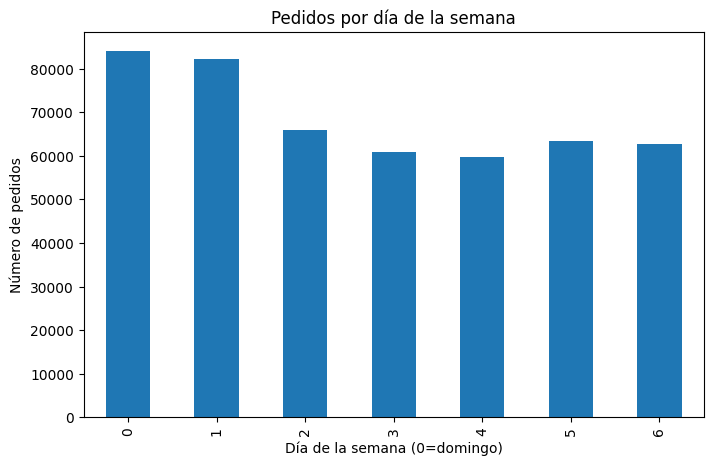

In [40]:
orden_dia = df_instacart_orders['order_dow'].value_counts().sort_index()

plt.figure(figsize=(8,5))
orden_dia.plot(kind='bar')
plt.xlabel('Día de la semana (0=domingo)')
plt.ylabel('Número de pedidos')
plt.title('Pedidos por día de la semana')
plt.show()

Escribe aquí tus conclusiones: Se evidencia que el dia de la semana en que más realizan pedidos es el dia domingo y los lunes esto puede presentarse ya que las personas hacen sus actividades del hogar en los dias de descanso, los demas dias se mantienen entre 60.000 y 65.000 eso puede ocurrir por que entre semana las personas estan en su hora laboral y podrian en un espacio realizar los pedidos.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

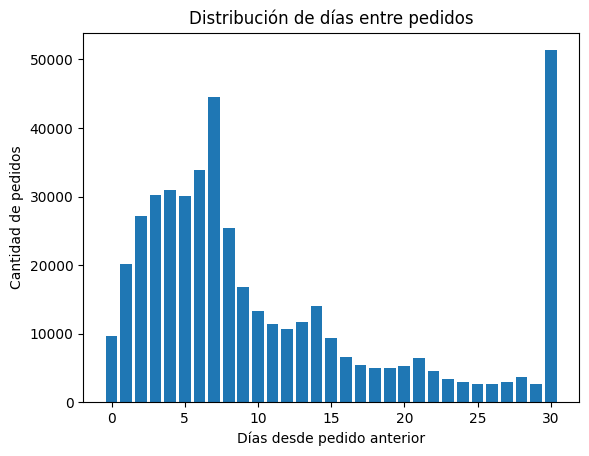

0.0 30.0


In [41]:
tiempo_pedido = df_instacart_orders['days_since_prior_order'].value_counts().sort_index()
plt.bar(tiempo_pedido.index, tiempo_pedido.values)
# Agregar etiquetas y título
plt.xlabel('Días desde pedido anterior')
plt.ylabel('Cantidad de pedidos')
plt.title('Distribución de días entre pedidos')
# Mostrar el gráfico
plt.show()
print(min(df_instacart_orders["days_since_prior_order"]), max(df_instacart_orders["days_since_prior_order"]))

Escribe aquí tus conclusiones: De acuerdo con el grafico se evidencia que los pedidos aumentan a los 30 dias y aproximadamente a los 8 dias los pedidos llegan a 45.000 entonces podriamos concluir que las personas compran sus viveres cada mes y que otros lo hacen cada 8 dias.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

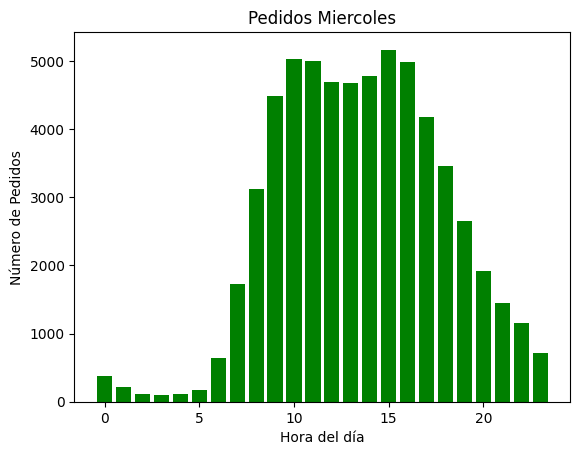

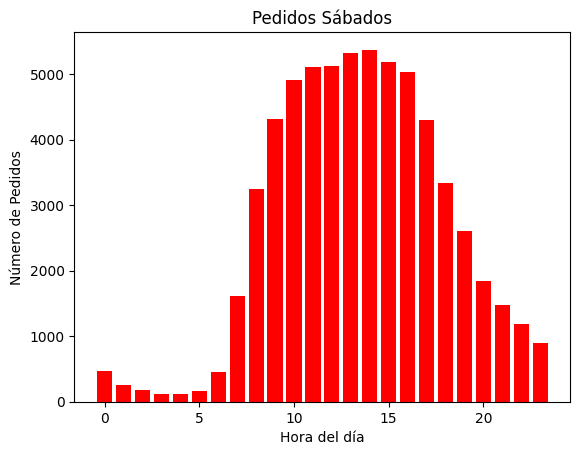

In [42]:
miercoles=df_instacart_orders[df_instacart_orders['order_dow']==3]
orden_miercoles=miercoles['order_hour_of_day'].value_counts().sort_index()
plt.bar(orden_miercoles.index, orden_miercoles.values, color="green")
# Agregar etiquetas y título
plt.xlabel('Hora del día')
plt.ylabel('Número de Pedidos')
plt.title('Pedidos Miercoles')
# Mostrar el gráfico
plt.show()
sabados=df_instacart_orders[df_instacart_orders['order_dow']==6]
orden_sabados=sabados['order_hour_of_day'].value_counts().sort_index()
plt.bar(orden_sabados.index, orden_sabados.values, color="red")
# Agregar etiquetas y título
plt.xlabel('Hora del día')
plt.ylabel('Número de Pedidos')
plt.title('Pedidos Sábados')
# Mostrar el gráfico
plt.show()

Escribe aquí tus conclusiones: Concluimos que las diferencias que se presentan en los dias miercoles y sabados es que entre las horas de almuerzo disminuye los pedidos, podria presentarse por que durante ese horario el personal no esta disponible y los dias sabados en ese horario superan los pedidos en mas de 5.000

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

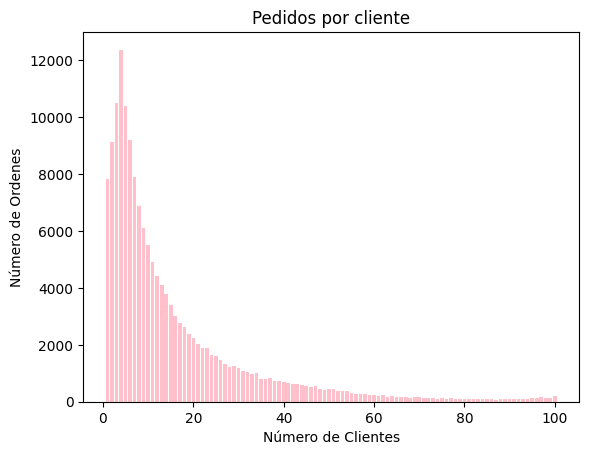

In [43]:
pedido_cliente = df_instacart_orders.groupby('user_id')['order_number'].max()
distribucion=pedido_cliente.value_counts().sort_index()
plt.bar(distribucion.index, distribucion.values, color="pink")
# Agregar etiquetas y título
plt.xlabel('Número de Clientes')
plt.ylabel('Número de Ordenes')
plt.title('Pedidos por cliente')
# Mostrar el gráfico
plt.show()

Escribe aquí tus conclusiones: El numero de clientes entre 30 a 100 han realizado menos de 2.000 ordenes y entre 1 y 20 clientes han realizado ordenes entre 1.000 y mas de 12.000 ordenes

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [44]:
principales_productos = df_order_products.groupby('product_id').size().sort_values(ascending=False).reset_index(name='conteo')
principales_productos=principales_productos.merge(df_products, on='product_id')
principales_productos=principales_productos[['product_id', 'product_name', 'conteo']]
print(principales_productos.head(20))

    product_id              product_name  conteo
0        24852                    Banana   66050
1        13176    Bag of Organic Bananas   53297
2        21137      Organic Strawberries   37039
3        21903      Organic Baby Spinach   33971
4        47209      Organic Hass Avocado   29773
5        47766           Organic Avocado   24689
6        47626               Large Lemon   21495
7        16797              Strawberries   20018
8        26209                     Limes   19690
9        27845        Organic Whole Milk   19600
10       27966       Organic Raspberries   19197
11       22935      Organic Yellow Onion   15898
12       24964            Organic Garlic   15292
13       45007          Organic Zucchini   14584
14       39275       Organic Blueberries   13879
15       49683            Cucumber Kirby   13675
16       28204        Organic Fuji Apple   12544
17        5876             Organic Lemon   12232
18        8277  Apple Honeycrisp Organic   11993
19       40706    Or

Escribe aquí tus conclusiones: Entre los productos mas populares se tienen varias frutas como el banano, las fresas y limón y algunos vegetales como aguacate y espinaca y los clientes consumen muchos productos organicos que son mejores para la salud.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [45]:
compras_articulos = df_order_products.groupby('order_id').size().sort_values(ascending=False).reset_index(name='conteo')
print(compras_articulos.sample(20))


        order_id  conteo
161716   1837528      11
134364    524070      12
365500   2645881       4
344346   3025048       4
73047    2968435      17
439825   1068767       1
119865   1701017      13
86083     830587      16
53359    3273549      19
263869    632416       7
3818     3152830      36
442497   1961791       1
380709    950890       3
58133    3248452      18
47836    2986591      20
85412    2528844      16
72416    1717648      17
279169   2525015       6
314563    449837       5
69970    2081934      17


(array([3.35653e+05, 9.70320e+04, 1.47150e+04, 2.28100e+03, 2.90000e+02,
        5.40000e+01, 1.00000e+01, 7.00000e+00, 2.00000e+00, 2.00000e+00]),
 array([  1. ,  13.6,  26.2,  38.8,  51.4,  64. ,  76.6,  89.2, 101.8,
        114.4, 127. ]),
 <BarContainer object of 10 artists>)

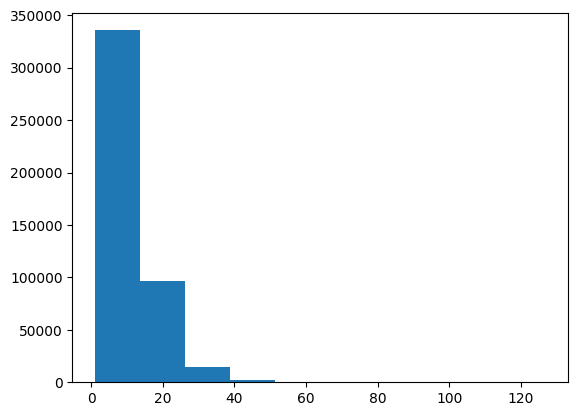

In [46]:
plt.hist(x=compras_articulos['conteo'])

Escribe aquí tus conclusiones: De acuerdo al histograma más de 300.000 pedidos tiene un promedio de 0 a 10 productos.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [47]:
articulos_frecuencia=df_order_products.query('reordered==1').groupby(['product_id']).size().sort_values(ascending=False).head(20).reset_index(name='conteo')
articulos_frecuencia=articulos_frecuencia.merge(df_products, on='product_id')
articulos_frecuencia=articulos_frecuencia[['product_id', 'product_name', 'conteo']]
print(articulos_frecuencia)

    product_id              product_name  conteo
0        24852                    Banana   55763
1        13176    Bag of Organic Bananas   44450
2        21137      Organic Strawberries   28639
3        21903      Organic Baby Spinach   26233
4        47209      Organic Hass Avocado   23629
5        47766           Organic Avocado   18743
6        27845        Organic Whole Milk   16251
7        47626               Large Lemon   15044
8        27966       Organic Raspberries   14748
9        16797              Strawberries   13945
10       26209                     Limes   13327
11       22935      Organic Yellow Onion   11145
12       24964            Organic Garlic   10411
13       45007          Organic Zucchini   10076
14       49683            Cucumber Kirby    9538
15       28204        Organic Fuji Apple    8989
16        8277  Apple Honeycrisp Organic    8836
17       39275       Organic Blueberries    8799
18        5876             Organic Lemon    8412
19       49235      

Escribe aquí tus conclusiones: De acuerdo con el resultado anterior se observa que los principales productos que se piden con mas frecuencias son frutas como el banano, las fresas, limon, frambuessas y algunos vegetales organicos

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [48]:
reorden_producto = df_order_products.groupby('product_id').size()
reorden=df_order_products[df_order_products['reordered']==1]
reorden=reorden.groupby('product_id').size()
proporcion=(reorden/reorden_producto).fillna(0)
print(proporcion.head(20))

product_id
1     0.564286
2     0.000000
3     0.738095
4     0.510204
7     0.500000
8     0.315789
9     0.761905
10    0.448071
11    0.625000
12    0.390244
13    0.500000
14    0.000000
17    0.000000
18    0.533333
19    0.000000
21    0.000000
22    0.500000
23    0.380952
24    0.000000
25    0.674576
dtype: float64


Escribe aquí tus conclusiones: Al calcular la proporción de reorden por producto, obtenemos una métrica útil para entender el comportamiento de recompra de los clientes. Esta proporción nos indica qué tan frecuentemente un producto que fue comprado una vez, vuelve a ser pedido en futuras órdenes. Tambien se puede validar que productos son de consumo frecuente o de mas gusto de los clientes.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [49]:
clientes_productos=df_order_products.merge(df_instacart_orders, on='order_id')
total_producto = clientes_productos.groupby('user_id').size()
reorden=clientes_productos[clientes_productos['reordered']==1]
reorden=reorden.groupby('user_id').size()
proporcion=(reorden/total_producto).fillna(0)
print(proporcion.head(20))

user_id
2     0.038462
4     0.000000
5     0.666667
6     0.000000
7     0.928571
11    0.200000
12    0.250000
13    0.565217
14    0.360656
15    0.538462
16    0.531250
17    0.716981
19    0.291667
20    0.000000
21    0.400000
22    1.000000
24    0.500000
26    0.437500
27    0.658824
28    0.500000
dtype: float64


Escribe aquí tus conclusiones: De acuerdo con el resultado de la proporcion de productos que ya habian pedido se observa que los que estan proximos a 1 los clientes tienden a reordenar frecuentemente dichos productos y cuando estan proximo a 0 el cliente rara vez vuelve a pedir lo mismo

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [50]:
primeros_productos = df_order_products[df_order_products['add_to_cart_order'] == 1]
conteo_productos = primeros_productos['product_id'].value_counts().head(20)
top20 = conteo_productos.reset_index()
top20.columns = ['product_id', 'veces_agregado_primero']
top20 = top20.merge(df_products, on='product_id', how='left')
print(top20[['product_id', 'product_name', 'veces_agregado_primero']])

    product_id                 product_name  veces_agregado_primero
0        24852                       Banana                   15562
1        13176       Bag of Organic Bananas                   11026
2        27845           Organic Whole Milk                    4363
3        21137         Organic Strawberries                    3946
4        47209         Organic Hass Avocado                    3390
5        21903         Organic Baby Spinach                    3336
6        47766              Organic Avocado                    3044
7        19660                 Spring Water                    2336
8        16797                 Strawberries                    2308
9        27966          Organic Raspberries                    2024
10       44632   Sparkling Water Grapefruit                    1914
11       49235          Organic Half & Half                    1797
12       47626                  Large Lemon                    1737
13         196                         Soda     

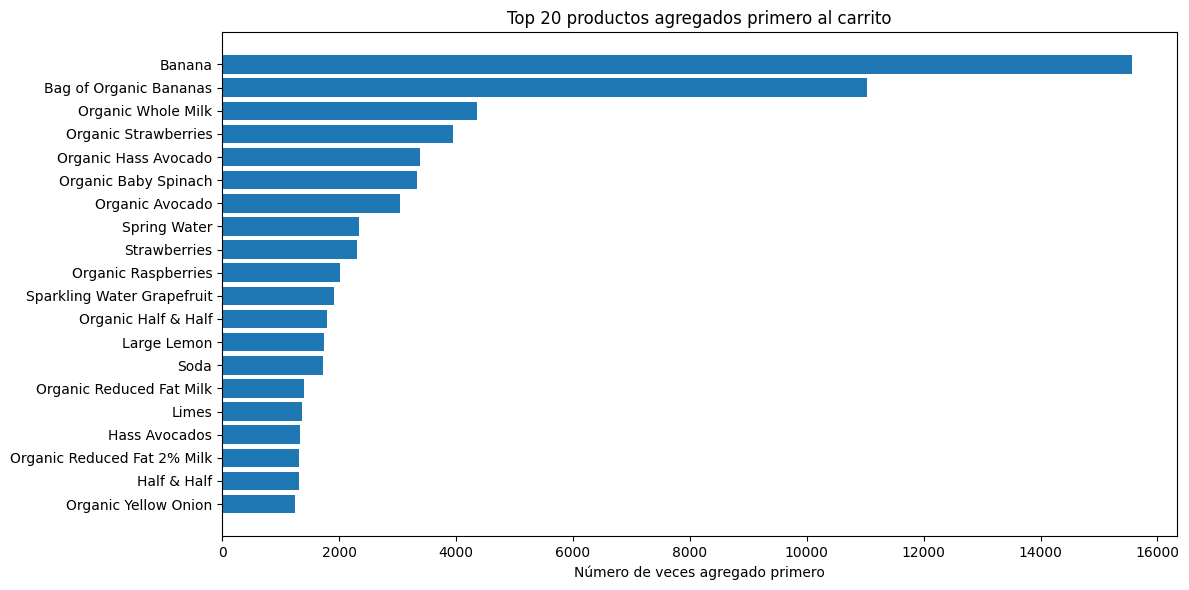

In [51]:
plt.figure(figsize=(12,6))
plt.barh(top20['product_name'], top20['veces_agregado_primero'])
plt.gca().invert_yaxis()
plt.title('Top 20 productos agregados primero al carrito')
plt.xlabel('Número de veces agregado primero')
plt.tight_layout()
plt.show()

Escribe aquí tus conclusiones: De acuerdo al resultado obtenido en el punto se puede concluir que los productos top 20 que ponen primero en sus pedidos son productos escenciales para los hogares de los clientes de igual manera son los que mas compran revisados en los puntos anteriores, podriamos indicar que es son productos comun en los hogares y son saludables.

### Conclusion general del proyecto:

In [ ]:
Como conclusiones generales del proyecto podemos indicar la importancia de observar los archivos y su contenido, al momento de abrir los archivos es escencial validar la separacion del mismo para que nos muestre la totalidad de las columnas por cada DataFrame.

In [ ]:
Seguido al proceso anterior se debe hacer el procesamiento de datos de una manera adecuada para eliminar los valores duplicados sin entrar a eliminar duplicados engañosos que si son necesarios para el analisis de los datos. De igual manera es necesario la validacion de los datos ausentes y hacer el reemplazo con un dato que nos permita validar la informacion.

In [ ]:
Luego del procesamiento de datos el analisis de datos nos permite entender a que corresponden los DataFrame e interpretar los resultados a cada cuestionamiento, pensar por que los clientes realizan sus pedidos en ciertas horas del dia y en ciertos dias, asi como que productos compran con mayor frecuencia, cada cuanto hacen sus pedidos. 

In [ ]:
Los resultados de cada punto nos muestra el comportamiento, la distribucion, proporcion y top de productos que hacen que se pueda tomar decisiones sobre posibles descuentos para los productos que menos compran, hacer promociones en dias especificos u otras horas y esto generaria cambios en las compras por clientes.